In [370]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [371]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)


In [372]:
lg = LogisticRegression(penalty='l2',C=1/(2*0.004),solver='sag', max_iter=2000)
lg.fit(X,y)
print(lg.coef_,lg.intercept_)



[[14.68386075  1.09977046]] [9.82976692]


In [373]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [374]:
def calculate_cost(X, y, W, alpha):
    m = len(y)  # Number of training examples

    # Predicted probabilities
    y_hat = sigmoid(np.dot(X, W))

    # Log-loss (avoid log(0) by adding a small epsilon)
    epsilon = 1e-15  # To prevent log(0) errors
    log_loss = - (1 / m) * np.sum(
        y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon)
    )

    # L2 Regularization (excluding bias term W[0])
    regularization = alpha * np.sum(W[1:] ** 2)

    # Total cost
    total_cost = log_loss + regularization
    return total_cost

In [375]:
class LogWithLin:
    def __init__(self,alpha,epochs,lr):
        self.epoch = epochs
        self.lr = lr
        self.alpha = alpha
    def fit(self,X,y):
        costs = []
        X = np.insert(X, 0, 1, axis=1)  # Add bias term to X
        W = np.zeros(X.shape[1])  # Initialize weights, including bias term
        
        # Gradient descent
        for epoch in range(self.epoch):
            y_hat = sigmoid(np.dot(X, W))  # Predicted values using the sigmoid function
            
            # Calculate gradient with regularization (excluding the bias term)
            # gradient = (1 / X.shape[0]) * np.dot(X.T, (y_hat - y))  # Logistic regression gradient
            gradient = - (1 / X.shape[0]) * np.dot((y - y_hat),X)  # Logistic regression gradient
            regularization = 2 * self.alpha * W  # Regularization term
            regularization[0] = 0  # Exclude bias term from regularization
            
            # Update weights
            W = W - self.lr * (gradient + regularization)
            
            costs.append(calculate_cost(X,y,W,self.alpha))
        # plt.plot(np.arange(0,self.epoch),costs)
        print(W[1:],W[0])
        print(lg.coef_,lg.intercept_)
        m, b = lg.coef_[0][0] / lg.coef_[0][1], lg.intercept_[0]/lg.coef_[0][1]
        XX = np.linspace(-4,5,100)
        print(m,b)
        plt.plot(XX, m * XX + b)
        # plt.scatter(X[:,0],X[:,1])
        m, b = W[1] / W[2],  W[0] / W[2]
        print(m,b)
        plt.plot(XX, m * XX + b)
        plt.show()

[3.76187208 0.03365936] 2.4384047230355748
[[14.68386075  1.09977046]] [9.82976692]
13.351750446114485 8.938016855368355
111.76302360585835 72.44358092233264


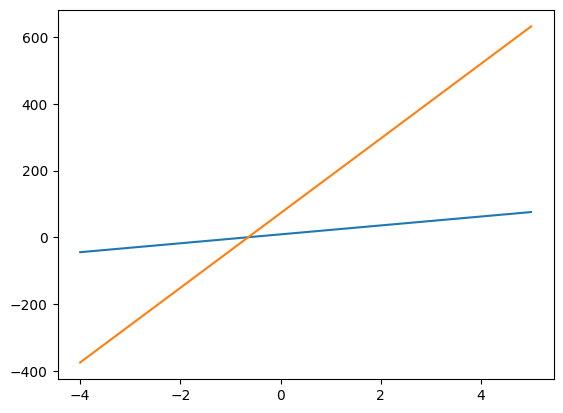

In [376]:
logLin = LogWithLin(0.004,2000,0.6)
logLin.fit(X,y)